# Importing the Dependencies

In [220]:
import numpy as np    # To make Numpy arrays --> For easier computing
import pandas as pd   # Creating Dataframes --> Nice structured format
import seaborn as sns   # Used to plot beautiful graphs and pictorial representation
import matplotlib.pyplot as plt   # Pictorial representation
from sklearn.preprocessing import scale, StandardScaler    # Used to standardize our data
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC  # Main model to do prediction
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report    # To compute accuracy score of our prediction
import warnings
warnings.simplefilter(action='ignore')

# Data Collection and Analysis

**Read the data from CSV file**

In [221]:
dtst = pd.read_csv('/content/diabetes.csv')

**Gathering Information about dataset**

In [222]:
dtst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Descriptive Stats of Dataset**

In [223]:
dtst.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Checking the Shape of the dataset**
(Rows, columns)

In [224]:
dtst.shape

(768, 9)

**Getting the distribution of Outcome column**

In [225]:
dtst['Outcome'].value_counts()*100/len(dtst)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

**Plotting the graphical representations of Outcome Column**

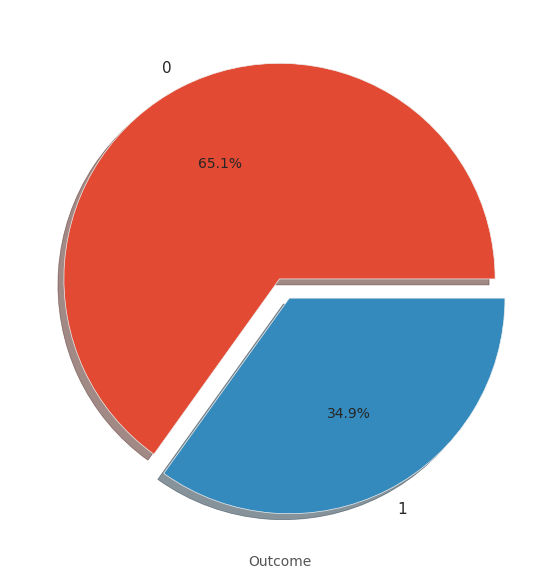

In [226]:
f = plt.figure(figsize=(8,7))
dtst['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct = "%1.1f%%", shadow=True)
plt.ylabel('')
plt.xlabel('Outcome', fontsize = 10)
plt.show()

**Plotting the Histogram of Age**

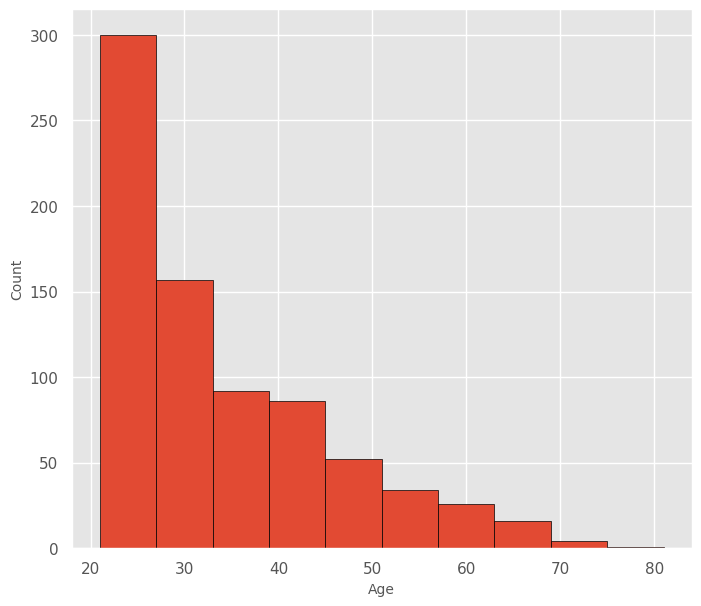

In [227]:
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
dtst.Age.hist(edgecolor = 'black')
plt.show()

**Maximum and Minimum Age**

In [228]:
print("Maximum age is : " + str(dtst.Age.max()))
print("Minimum age is : " + str(dtst.Age.min()))

Maximum age is : 81
Minimum age is : 21


**Analyse how feautures changes based on Outcome column**

In [229]:
dtst.groupby("Outcome").agg({'Pregnancies' : 'mean', 'Glucose' : 'mean', 'BloodPressure' : 'mean', 'SkinThickness' : 'mean', 'Insulin' : 'mean', 'BMI' : 'mean', 'DiabetesPedigreeFunction' : 'mean', 'Age' : 'mean'})

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [230]:
# Above results shows that if the test report of any of the column is coming under the values infront of 0
# This means the person has high chances that he is not diabetic

# example :- if the Glucose level of a person is less than 109.98 then he has a very low chance of being diabetic
#            if the Glucose level is more than 141.25 then he has fairly high chance of being diabetic

**Corelation Matrix formation**

In [231]:
dtst.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**Plotting a HeatMap of this corelated matrix**

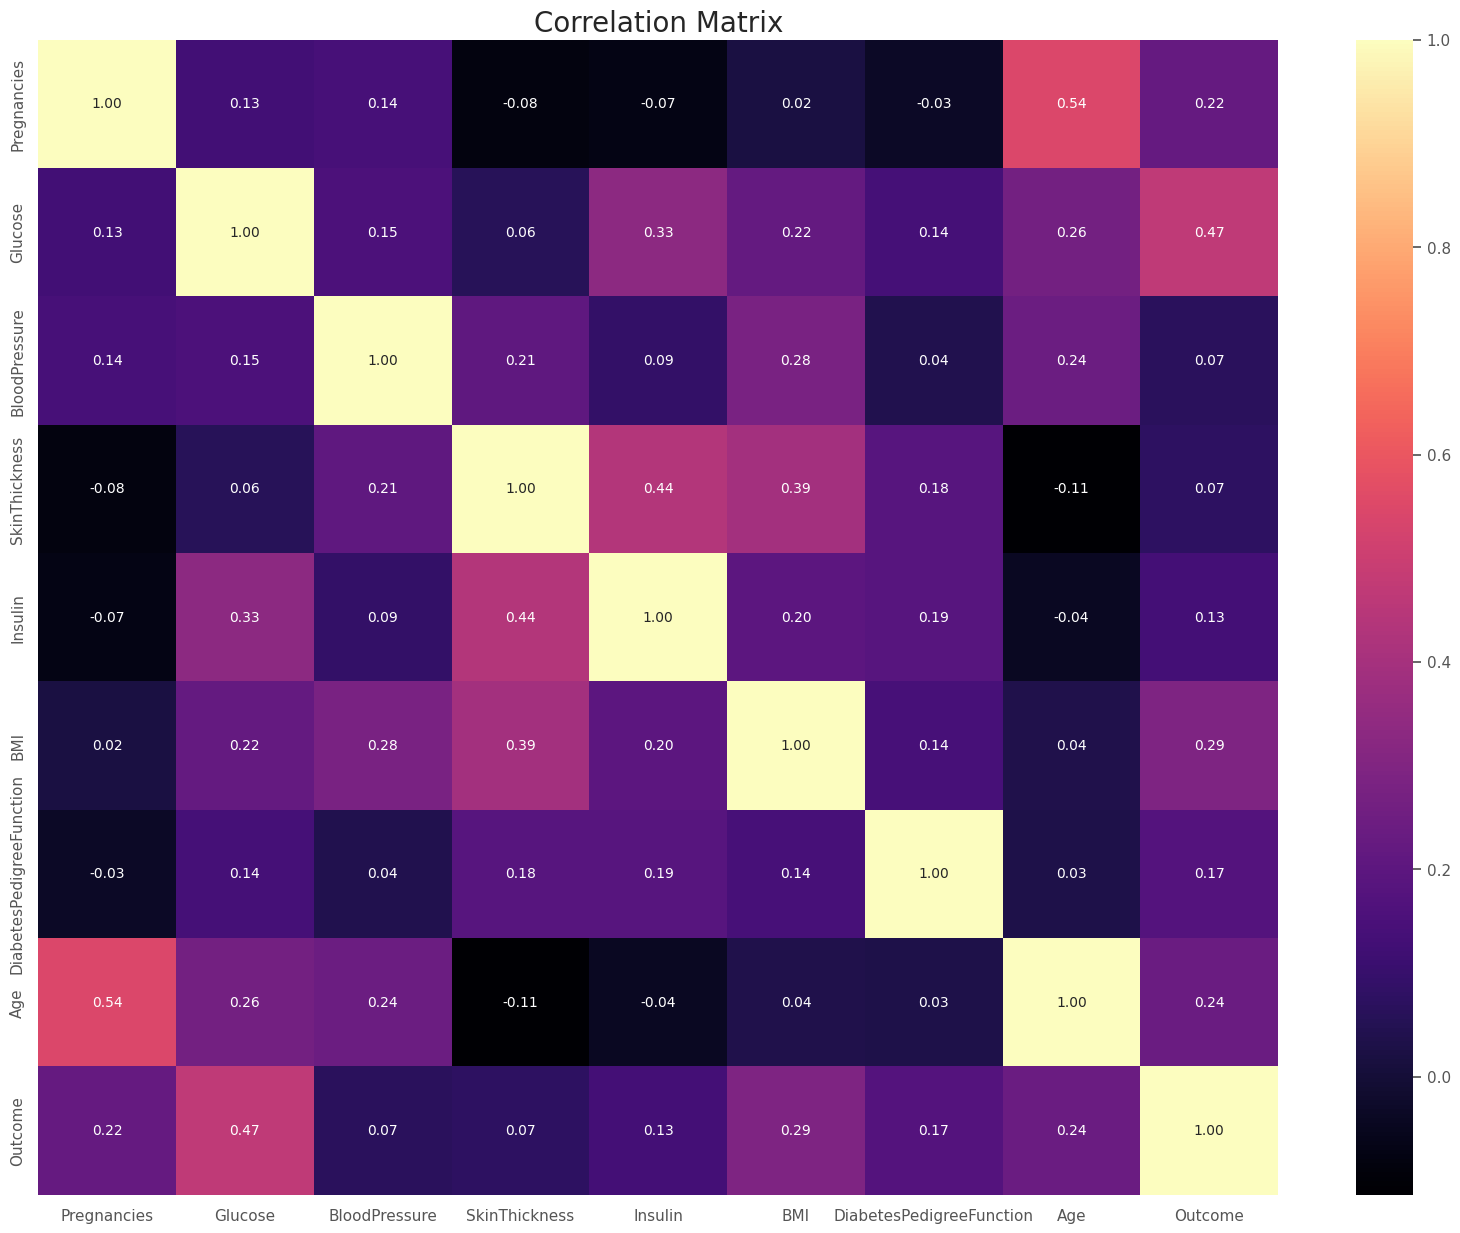

In [232]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(dtst.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

**Converting 0 to Nan value**

In [233]:
# In our data set, all Nan values has been replaced by 0, to make it look like a complete dataset
# Now we will replace the 0s to Nan and then handle the missing values accordingly

In [234]:
dtst.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [235]:
dtst[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = dtst[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)

In [236]:
# All 0s has been replaced by Nan, we've not touched Outcome column coz 0 has a seperate significance there

# Data Preprocessing

In [237]:
dtst.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [238]:
dtst.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10.0,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8.0,125.0,96.0,NaN,NaN,NaN,0.232,54,1


**Handling Missing Values**

In [239]:
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(missing_values=np.NaN, strategy = "median")

# imputer.fit(dtst)

# dtst = pd.DataFrame(imputer.transform(dtst), columns=dtst.columns)



# Median function to find median of each column grouped by values of Outcome
def median_target(var):
    temp = dtst[dtst[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [240]:
# Replacing all the missing values with Median value of that column
columns = dtst.columns
columns = columns.drop("Outcome")
for i in columns:
    dtst.loc[(dtst['Outcome'] == 0 ) & (dtst[i].isnull()), i] = median_target(i)[i][0]
    dtst.loc[(dtst['Outcome'] == 1 ) & (dtst[i].isnull()), i] = median_target(i)[i][1]


In [241]:
dtst.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [242]:
dtst.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Outlier Detection

In [243]:
# Using IQR (Inter Quartile Range) ---> Also called the Median
# IQR ==> 50%
# Q3 ==> 24.65% right of IQR
# Q1 ==> 24.65% left of IQR
# 24.65 ~ 25%

# Therefore, all values less than Q1 and more than Q3 are considered as Outlier

# Finding which all column has outliers

for feature in dtst:
    Q1 = dtst[feature].quantile(0.25)   # Starting ka 25%
    Q3 = dtst[feature].quantile(0.75)   # Ending ka 25% ==> Starting se 75%
    IQR = Q3-Q1

    # Setting the upper and the lower limit

    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR


    if dtst[(dtst[feature]>upper)].any(axis=None):
        print(feature, " :- YES")
    elif dtst[(dtst[feature]<lower)].any(axis=None):
        print(feature, " :- YES")
    else:
        print(feature, " :- NO")

Pregnancies  :- YES
Glucose  :- NO
BloodPressure  :- YES
SkinThickness  :- YES
Insulin  :- YES
BMI  :- YES
DiabetesPedigreeFunction  :- YES
Age  :- YES
Outcome  :- NO


**Visualising Outliers**

Text(0.5, 0, 'Box plot of Insulin')

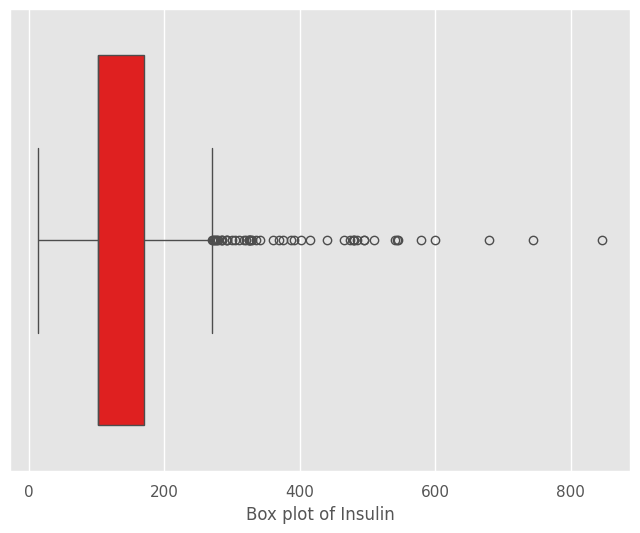

In [244]:
# As we saw there are Outliers in some columns
# Now we'll visualize outliers by using boxplot

plt.figure(figsize = (8, 6))
sns.boxplot(x= dtst["Insulin"], color="red")
plt.xlabel('Box plot of Insulin')

In [245]:
# Above we can see there are many outliers in Insulin column
# We must remove them, else they can hamper the accuracy of our model

**Removing Outliers from out data set**

In [246]:
Q1 = dtst.Insulin.quantile(0.25)
Q3 = dtst.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
dtst.loc[dtst['Insulin']>upper, "Insulin"] = upper

Text(0.5, 0, 'Box plot of Insulin')

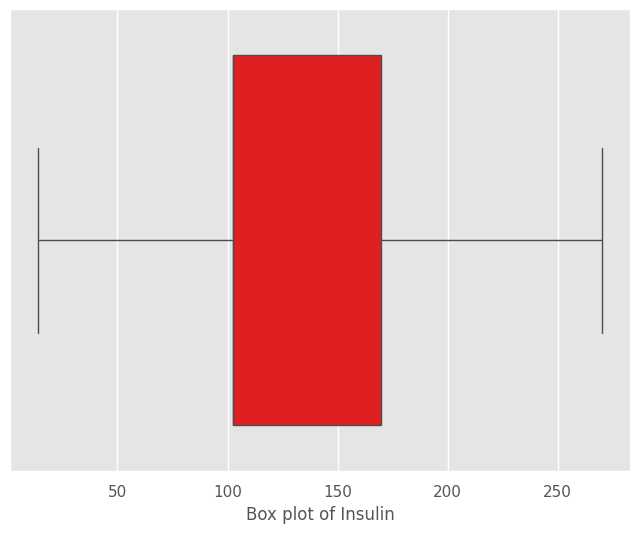

In [247]:
plt.figure(figsize = (8, 6))
sns.boxplot(x= dtst["Insulin"], color="red")
plt.xlabel('Box plot of Insulin')

In [248]:
# As we can see, we've sucessfully removed the outliers from Insulin column
# But to do this for all columns, we need to use LOF (Local Outlier Factor)

# LOF
# local outlier factor
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=8)
lof.fit_predict(dtst)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [249]:
dtst.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Text(0.5, 0, 'Box plot of Pregnancies')

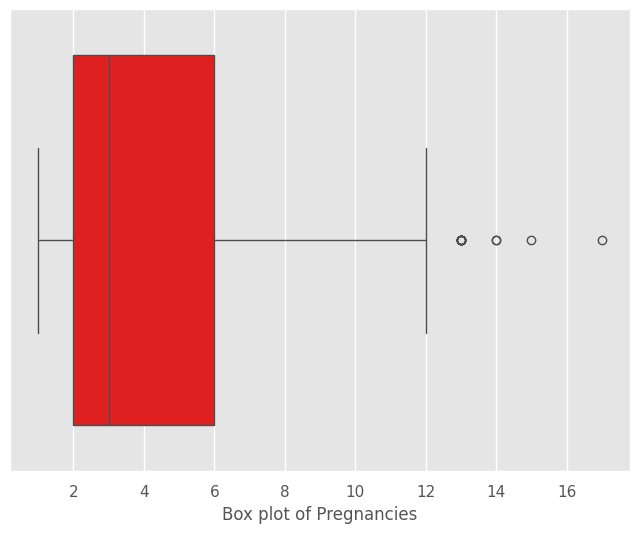

In [250]:
plt.figure(figsize = (8, 6))
sns.boxplot(x= dtst["Pregnancies"], color="red")
plt.xlabel('Box plot of Pregnancies')

In [251]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:20]

array([-3.17398186, -2.37365398, -2.18682333, -2.14337268, -2.13897321,
       -2.02701025, -1.85493532, -1.79278408, -1.77692497, -1.75410894,
       -1.74603802, -1.72838898, -1.72263872, -1.66124454, -1.65931937,
       -1.64269419, -1.63423784, -1.62307259, -1.62285539, -1.56331833])

In [252]:
threshold = np.sort(df_scores)[3]
threshold

-2.143372684494785

In [253]:
outlier = df_scores>threshold

In [254]:
df = dtst[outlier]

In [255]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [256]:
df.shape

(764, 9)

Text(0.5, 0, 'Box plot of Pregnancies')

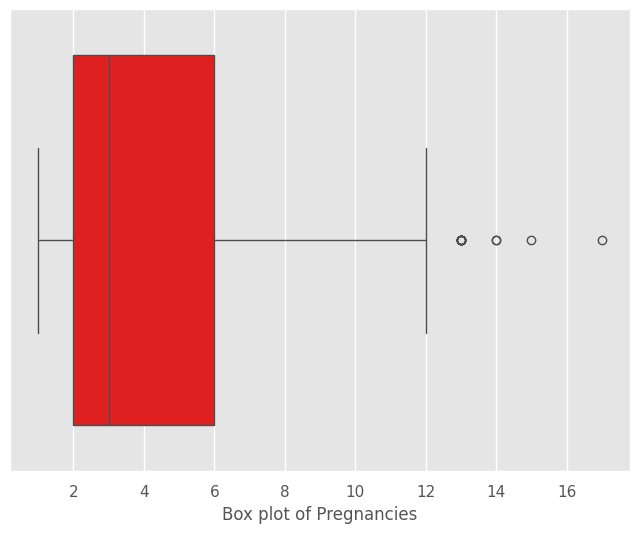

In [257]:
plt.figure(figsize = (8, 6))
sns.boxplot(x= dtst["Pregnancies"], color="red")
plt.xlabel('Box plot of Pregnancies')

# Feature Engineering

In [258]:
# Feature Enginnering

# Adding new features / Columns

NewBMI = pd.Series(["Underweight","Normal", "Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

In [259]:
NewBMI

0    Underweight
1         Normal
2     Overweight
3      Obesity 1
4      Obesity 2
5      Obesity 3
dtype: category
Categories (6, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight',
                         'Underweight']

In [260]:
# Adding new features into data set

dtst['NewBMI'] = NewBMI
dtst.loc[dtst["BMI"]<18.5, "NewBMI"] = NewBMI[0]
dtst.loc[(dtst["BMI"]>18.5) & dtst["BMI"]<=24.9, "NewBMI"] = NewBMI[1]
dtst.loc[(dtst["BMI"]>24.9) & dtst["BMI"]<=29.9, "NewBMI"] = NewBMI[2]
dtst.loc[(dtst["BMI"]>29.9) & dtst["BMI"]<=34.9, "NewBMI"] = NewBMI[3]
dtst.loc[(dtst["BMI"]>34.9) & dtst["BMI"]<=39.9, "NewBMI"] = NewBMI[4]
dtst.loc[dtst["BMI"]>39.9, "NewBMI"] = NewBMI[5]

In [261]:
dtst.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [262]:
# if insulin>=16 & insuline<=166->normal

def set_insuline(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"


In [263]:
dtst = dtst.assign(NewInsulinScore=dtst.apply(set_insuline, axis=1))

In [264]:
dtst.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2,Abnormal
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2,Abnormal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [265]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Secret", "High"], dtype = "category")
dtst["NewGlucose"] = NewGlucose
dtst.loc[dtst["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
dtst.loc[(dtst["Glucose"] > 70) & (dtst["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
dtst.loc[(dtst["Glucose"] > 99) & (dtst["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
dtst.loc[dtst["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

**One Hot Encoding of new categories**

In [266]:
# One hot encoding
dtst = pd.get_dummies(dtst, columns = ["NewBMI", "NewInsulinScore", "NewGlucose"], drop_first=True)

In [267]:
dtst.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Secret
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,False,True,False,False,False,False,False,False,False
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,False,True,False,False,False,True,False,True,False
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,False,True,False,False,False,False,False,False,False
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False,True,False,False,False,True,False,True,False
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,False,False,True,False,False,False,False,False,False


In [268]:
dtst.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Secret'],
      dtype='object')

In [269]:
categorical_df = dtst[['NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Secret']]

In [270]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Secret
0,False,True,False,False,False,False,False,False,False
1,False,True,False,False,False,True,False,True,False
2,False,True,False,False,False,False,False,False,False
3,False,True,False,False,False,True,False,True,False
4,False,False,True,False,False,False,False,False,False


**Dividing data into Features matrix and Dependent variable**

In [271]:
y=dtst['Outcome']
X=dtst.drop(['Outcome','NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Secret'], axis=1)

In [272]:
cols = X.columns
index = X.index

**Splitting the dataset into Test set and Train set**

In [273]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# Feature Scaling in dataset

In [274]:
# Applying Robust Scaler technique first to deal with extreme outliers in our data set

from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X=transformer.transform(X)
X=pd.DataFrame(X, columns = cols, index = index)

In [275]:
# Now applying Standard Scaler to finetune the data, and normalise it

scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Support Vector Machine Model

**HyperParameter Tuning**

In [276]:
svc = SVC(probability=True)
parameter = {
    "gamma":[0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05,0.5, 0.01, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameter)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.01, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

**Finding the best parameters and scores out of compination of gamma and c**

In [277]:
grid_search.best_params_

{'C': 1, 'gamma': 0.1}

In [278]:
grid_search.best_score_

0.8549913367986139

In [279]:
svc = SVC(C=20, gamma = 0.01, probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(accuracy_score(y_test, svc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8892508143322475
0.8766233766233766
[[96 11]
 [ 8 39]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       107
           1       0.78      0.83      0.80        47

    accuracy                           0.88       154
   macro avg       0.85      0.86      0.86       154
weighted avg       0.88      0.88      0.88       154

